<center><h1>Stress Assessment and Management through Wearable Trackers</h1><center>

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.simplefilter(action = 'ignore')

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [55]:
# Read data
data = pd.read_csv('data/wesad_data.csv')

## Data Exploration

In [56]:
data.head()

,Unnamed: 0,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,...,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label
0,0,0.030728,0.005821,0.010321,0.054356,0.030728,0.005821,0.010321,0.054356,0.000021,...,-3.082275,4.026794,35.820000,0.010000,35.81,35.83,0.081356,0.001672,2,1
1,1,0.029033,0.000306,0.028210,0.029586,0.029033,0.000306,0.028210,0.029586,0.000020,...,-4.936218,4.008484,35.821579,0.009875,35.81,35.83,0.189831,-0.001544,2,1
2,2,0.029441,0.002970,0.016513,0.038531,0.029441,0.002970,0.016513,0.038531,0.000020,...,-8.805847,3.578186,35.827778,0.010304,35.81,35.84,0.108475,-0.000743,2,1
3,3,0.033775,0.005348,0.017201,0.048164,0.033775,0.005348,0.017201,0.048164,0.000023,...,-6.047058,6.504822,35.816667,0.009428,35.81,35.83,0.190476,-0.000165,2,1
4,4,0.023236,0.014438,0.000000,0.052292,0.023106,0.014645,-0.006192,0.052292,0.000016,...,-4.039001,5.755615,35.806842,0.007293,35.79,35.81,0.135593,-0.000842,2,1


In [5]:
data.columns

Index(['Unnamed: 0', 'net_acc_mean', 'net_acc_std', 'net_acc_min',
       'net_acc_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max',
       'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean',
       'ACC_z_std', 'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min',
       'BVP_max', 'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max',
       'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max',
       'EDA_tonic_mean', 'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max',
       'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean',
       'TEMP_std', 'TEMP_min', 'TEMP_max', 'BVP_peak_freq', 'TEMP_slope',
       'subject', 'label'],
      dtype='object')

In [6]:
# Label counts - Three different states( Baseline, Amusement and Stress)
data.label.value_counts()

1    3819
2    2156
0    1200
Name: label, dtype: int64

In [57]:
# Convert label into binary target variable
data.label = data.label.replace({1: 0, 2: 1, 0: 0})
data.label.value_counts()

0    5019
1    2156
Name: label, dtype: int64

In [58]:
data.label.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    69.95%
1    30.05%
Name: label, dtype: object

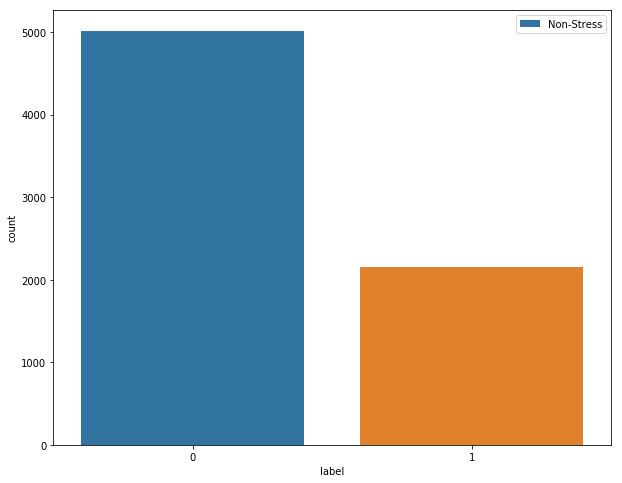

In [59]:
figure = plt.figure(figsize=(10,8))
figure = sns.countplot(x=data.label)
plt.legend(('Non-Stress','Stress'))

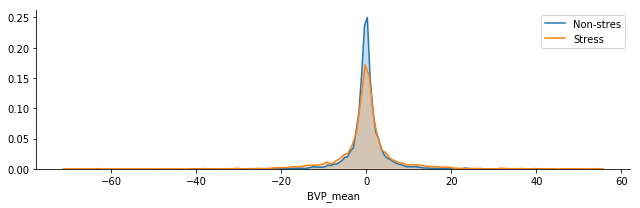

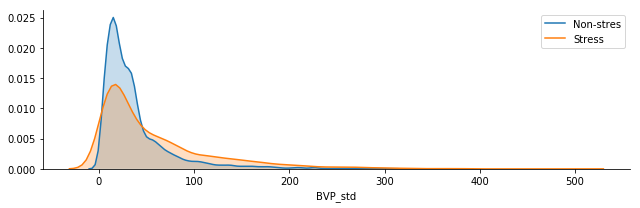

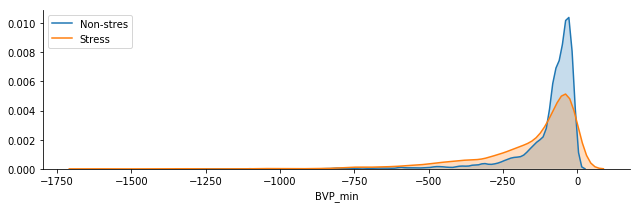

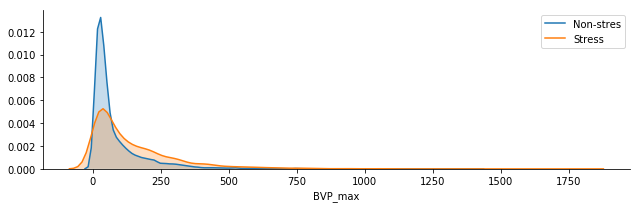

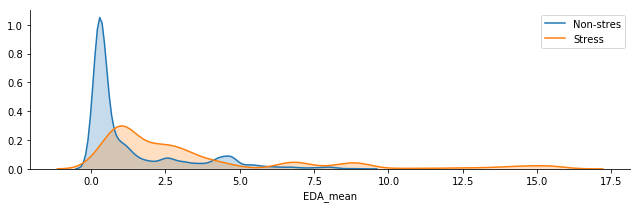

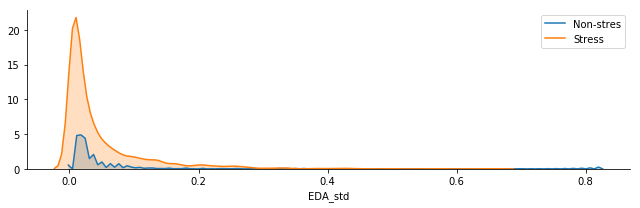

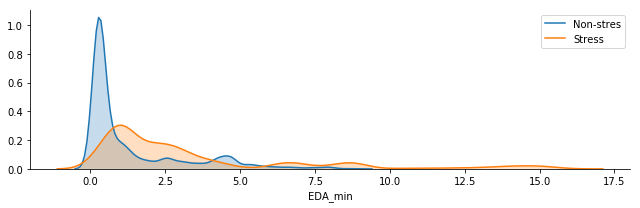

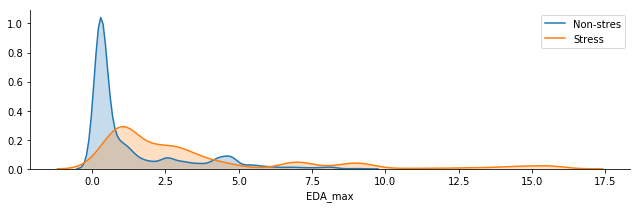

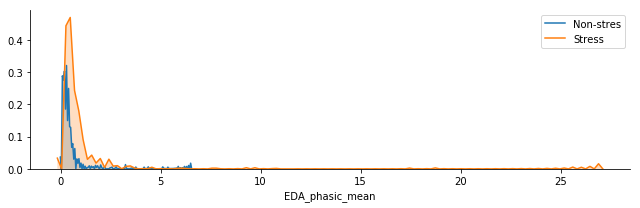

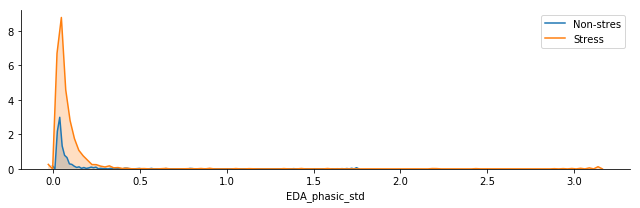

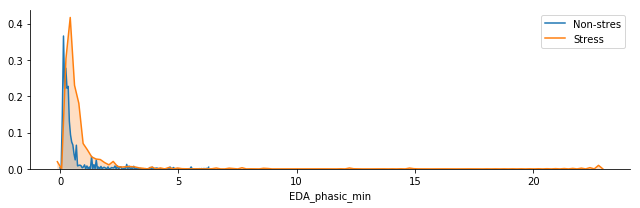

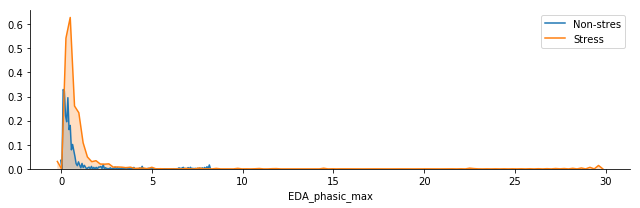

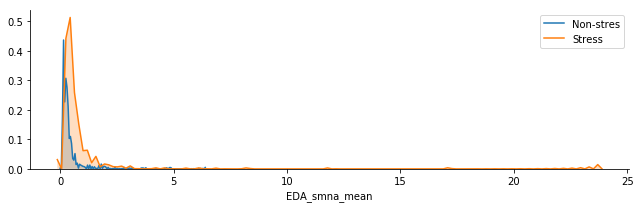

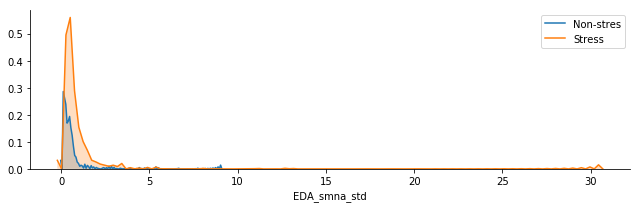

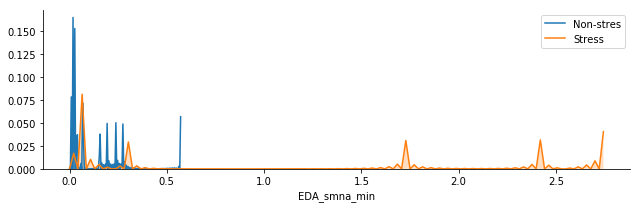

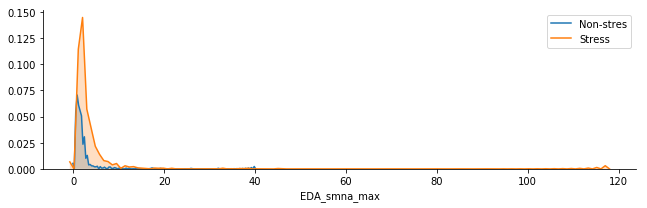

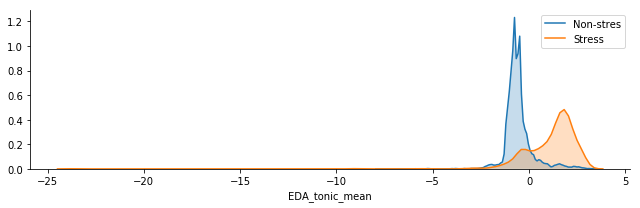

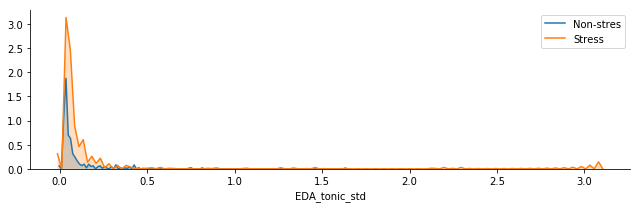

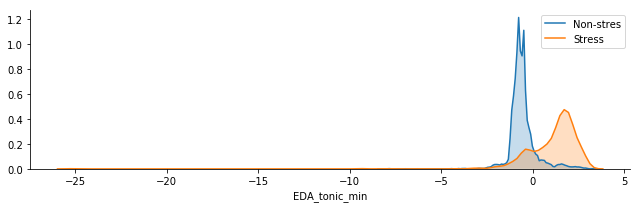

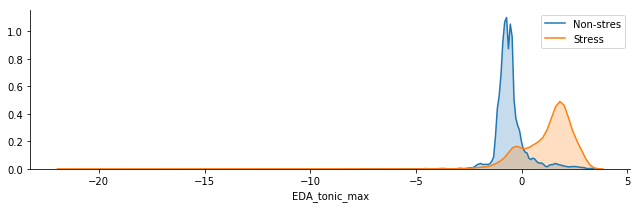

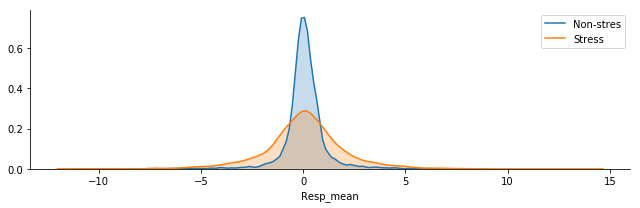

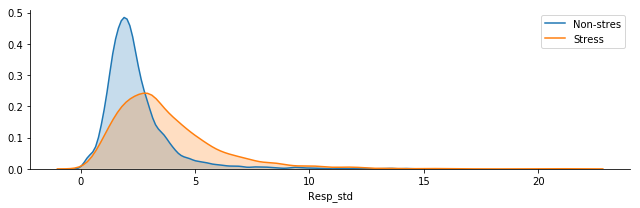

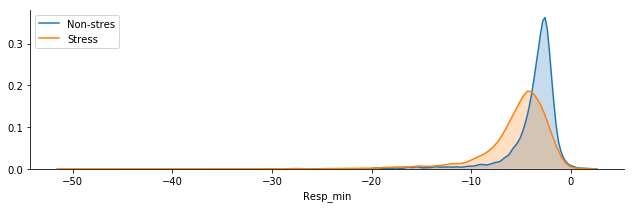

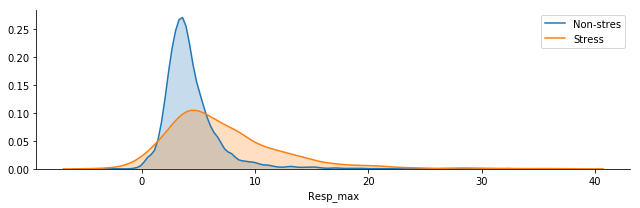

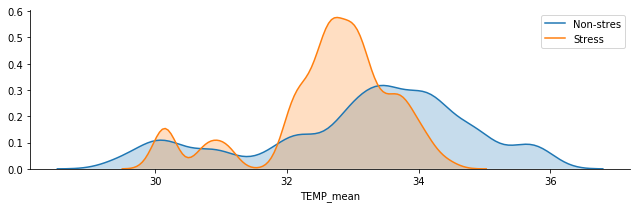

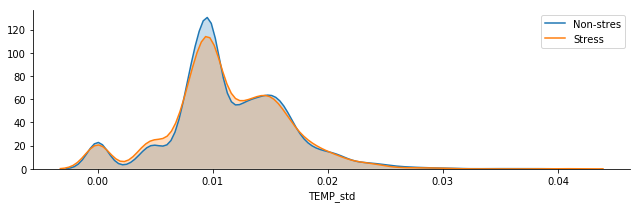

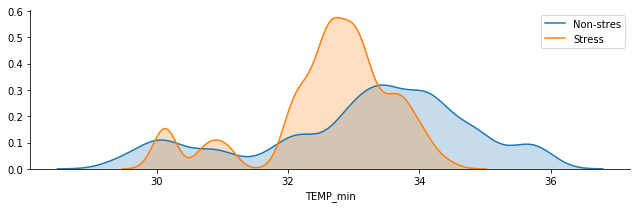

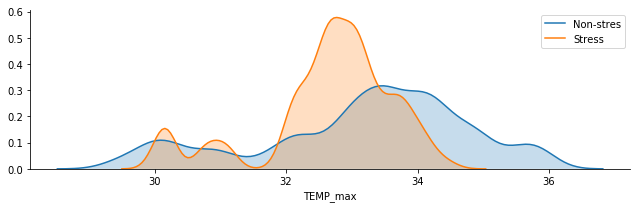

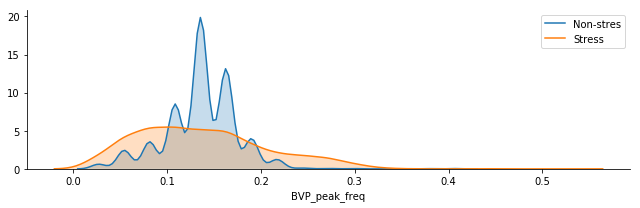

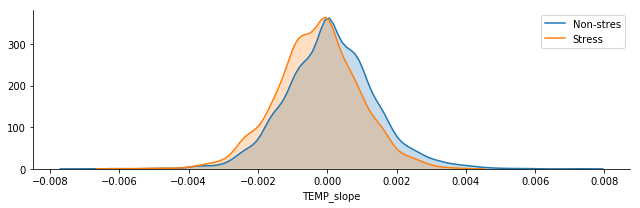

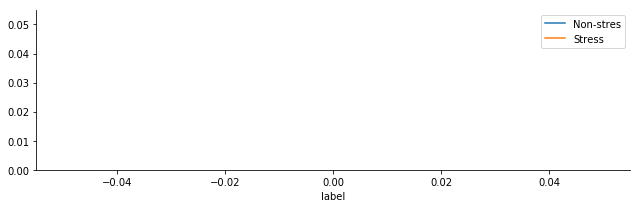

In [10]:
# Density distribution plots 
data_plot = data.drop(['Unnamed: 0', 'net_acc_mean', 'net_acc_std', 'net_acc_min',
       'net_acc_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max',
       'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean',
       'ACC_z_std', 'ACC_z_min', 'ACC_z_max','subject'], axis = 1)

for col in data_plot:
        fg = sns.FacetGrid(data_plot, hue="label", aspect=3)
        fg.map(sns.kdeplot, col, shade=True)
        plt.legend(('Non-stres', 'Stress'))
        plt.show()

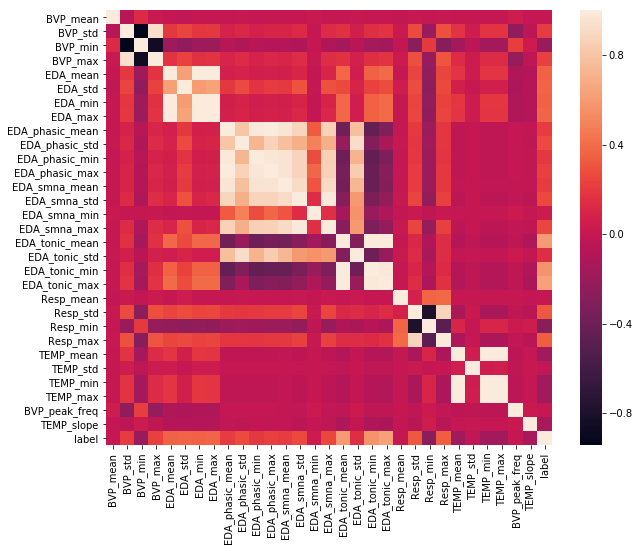

In [119]:
# Correlation coefficients
fig = plt.figure(figsize=(10,8))
sns.heatmap(data_plot.corr())
plt.show()

# Modeling

## Scaling features

In [60]:
from sklearn.preprocessing import StandardScaler

# Drop columns not relevant for analysis
X_data = data.drop(['Unnamed: 0', 'net_acc_mean', 'net_acc_std', 'net_acc_min',
       'net_acc_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max',
       'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean',
       'ACC_z_std', 'ACC_z_min', 'ACC_z_max','subject','label'], axis=1)

y = data['label']

# Scale features
scaler = StandardScaler()
scaler.fit(X_data)

X = scaler.transform(X_data)

X = pd.DataFrame(X, columns=X_data.columns)



## Split dataset

In [61]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

X_train

,BVP_mean,BVP_std,BVP_min,BVP_max,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_phasic_mean,EDA_phasic_std,...,Resp_mean,Resp_std,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope
3303,0.556498,-0.398678,0.429516,-0.536288,-0.641576,-0.406309,-0.642771,-0.642833,-0.220031,-0.295872,...,0.446814,-0.345816,0.598230,-0.188172,0.278760,-0.267514,0.282916,0.276288,-0.008840,0.271875
4810,-0.311759,0.509549,-0.492060,0.310257,1.710125,1.912443,1.705445,1.739736,-0.177826,-0.065222,...,-0.014840,-0.743050,0.655617,-0.399526,1.166838,-0.490163,1.167202,1.160161,-1.109122,0.974823
1940,0.051147,-0.618955,0.584562,-0.648245,-0.442113,-0.356159,-0.440777,-0.444871,-0.242590,-0.318758,...,-0.032370,-0.472402,0.309776,-0.586322,-0.260012,-0.756560,-0.261259,-0.267634,-0.008840,0.740507
4714,0.138435,-0.603293,0.535175,-0.611841,0.229429,-0.230236,0.241714,0.218990,-0.217677,-0.304935,...,-1.035681,-0.452740,-0.260023,-1.023925,-0.849412,-0.255326,-0.846248,-0.852350,0.527385,0.288035
3931,-0.277764,-0.623234,0.548670,-0.518870,-0.581791,-0.403636,-0.581773,-0.583659,-0.241488,-0.313545,...,0.078085,-0.196237,0.280321,-0.243728,0.610487,-0.756560,0.609422,0.602641,1.633233,0.740507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.169986,-0.654936,0.596873,-0.559276,-0.591978,-0.396345,-0.592478,-0.593706,-0.220647,-0.268734,...,-1.002922,0.640089,-0.392062,0.492990,-1.351914,-0.267514,-1.349611,-1.355478,1.072887,-0.762347
5191,-0.118031,-0.499605,0.511317,-0.606506,1.908419,0.856802,1.922364,1.897948,-0.193965,-0.155360,...,-0.441122,0.370167,-0.153376,0.339205,1.375872,1.476959,1.364466,1.377730,0.527385,0.205620
5226,-0.070466,2.870087,-4.411944,1.586821,1.250376,-0.162062,1.281571,1.226613,-0.228091,-0.297862,...,0.446155,0.618017,0.345833,0.851285,1.301899,-0.367899,1.303246,1.296141,-1.650914,-0.374514
5390,0.828917,-0.305847,0.400024,-0.490155,-0.632022,-0.400585,-0.632973,-0.633237,0.314336,0.069089,...,0.479136,-0.544363,0.537289,-0.524728,-0.550178,1.545447,-0.553754,-0.539595,-0.008840,1.516174


## Traininig Models

In [62]:
# Import classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Import metrics
from sklearn.metrics import f1_score, accuracy_score


# Classifiers dictionary to iterate
dict_classifiers = {
#     "Logistic regression": LogisticRegression(),
#     'Gaussian NB': GaussianNB(),
#     "KNN classifier":  KNeighborsClassifier(),
#     "Support Vector Machines" : SVC(kernel='rbf'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tress": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    'XGboost Classifier':XGBClassifier(eval_metric='mlogloss')
}



In [64]:
# Import cross validation
from sklearn.model_selection import cross_val_score

# Create scores dataframe to store the results
scores = pd.DataFrame(columns=['Model','Train Accuracy','F1 Score'])

# Import StratifiedKfold for cross validation
from sklearn.model_selection import StratifiedKFold

# Iterate over models and evaluate on training set 
for model, instance in dict_classifiers.items():
    model_ = instance.fit(X_train, y_train) 
    accuracy = np.mean(cross_val_score(model_, X_train, y_train, cv=StratifiedKFold(10), scoring='accuracy'))
    f1 = np.mean(cross_val_score(model_, X_train, y_train, cv=StratifiedKFold(10), scoring = 'f1'))
    scores = scores.append(pd.Series({'Model':model,'Accuracy':accuracy,'F1 Score':f1}),ignore_index=True)
    
# Dataframe with traininig results
scores.sort_values(by='F1 Score', ascending=False)

,Model,Train Accuracy,F1 Score
3,XGboost Classifier,0.993554,0.989408
2,Random Forest,0.987456,0.978864
0,Gradient Boosting,0.978397,0.965025
1,Decision Tress,0.971603,0.955229


## Recursive Feature Elimination Cross-Validation

In [65]:
# Import Recursive Feature Elimination Cross Validation
from sklearn.feature_selection import RFECV

# Set classifier as Random Forest
rfc = RandomForestClassifier(random_state = 42)

# Perform Feature Elimination
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print('Optimal number of features : {}'.format(rfecv.n_features_))

Optimal number of features : 11


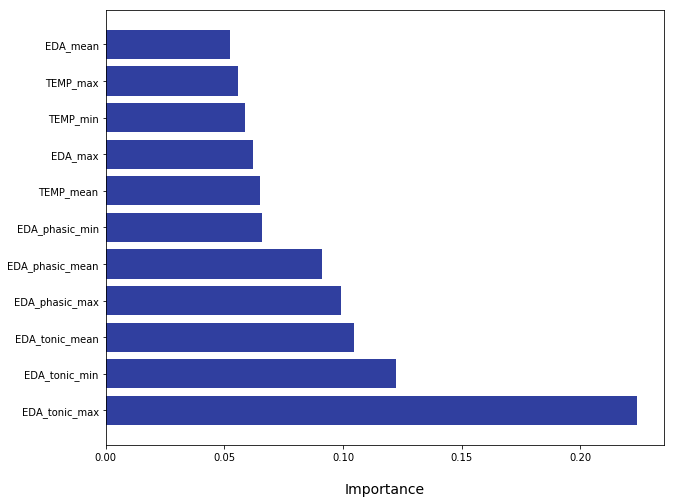

In [66]:
# Plot feature importance
rfecv.estimator_.feature_importances_

X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

# Dataframe to plot feature importance
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = rfecv.estimator_.feature_importances_

df = df.sort_values(by='importance', ascending=False)

# Plot feature importance
fig = plt.figure(figsize=(10,8))
plt.barh(y=df['Features'], width=df['importance'], color='#303F9F')
#plt.title('Fig.1 - RFECV - Feature importance', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

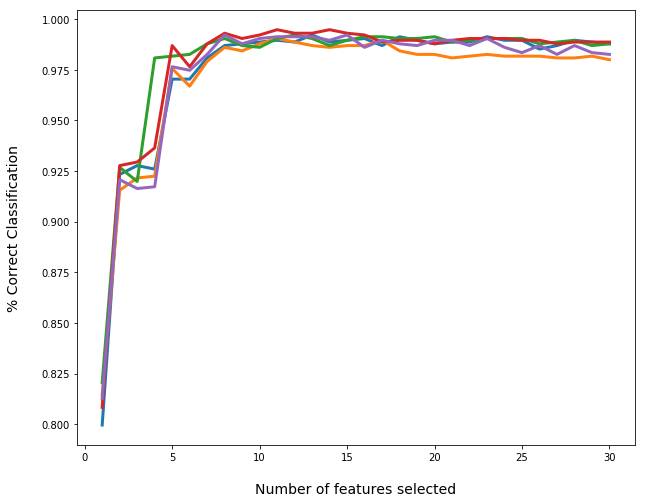

In [67]:
# Plot number of features vs accuracy
plt.figure(figsize=(10, 8))
#plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)

plt.show()

In [68]:
# Select important fearures for X test
X_test = X_test[X_train.columns]

## Resampling to overcome Class Imbalance

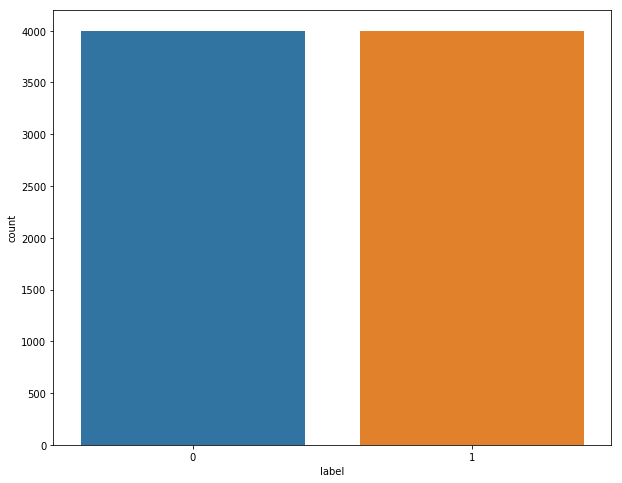

In [69]:
# Import SMOTETomek package
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)

# Fit resampling
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

# Plot label composition
fig = plt.figure(figsize=(10,8))
fig = sns.countplot(x=y_train)

## Train models with the selected features

In [70]:
# Create a dictionary with the 4 best performing models
dict_classifiers_2 = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tress": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    'XGboost Classifier':XGBClassifier(eval_metric='mlogloss')}

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# New score's dataframe to store the results
scores_2 = pd.DataFrame(columns=['Model','Train Accuracy','F1 Score'])

# Iterate over models and evaluate on training set 
for model, instance in dict_classifiers_2.items():
    # Fit the model on the training set
    model_ = instance.fit(X_train, y_train)
    # Evaluate on training set with 10-fold cross validation
    accuracy = np.mean(cross_val_score(model_, X_train, y_train, cv=StratifiedKFold(10), scoring='accuracy'))
    f1 = np.mean(cross_val_score(model_, X_train, y_train, cv=StratifiedKFold(10), scoring = 'f1'))
    # Append the results to dataframe
    scores_2 = scores_2.append(pd.Series({'Model':model,'Accuracy':accuracy,'F1 Score':f1}),ignore_index=True)
    
# Dataframe with traininig results
scores_2.sort_values(by='F1 Score', ascending=False)

,Model,Train Accuracy,F1 Score
3,XGboost Classifier,0.997126,0.997137
2,Random Forest,0.994252,0.994272
1,Decision Tress,0.990879,0.989764
0,Gradient Boosting,0.985504,0.985644


## Hyperparameter Tuning

### XGBoost Optuna Optimization

Code adapted from: https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py

In [71]:
import optuna
import sklearn.datasets
import sklearn.metrics

def objective(trial, data = X_train, target = y_train):
    
    # Split train and validation
    X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.25, random_state = 42)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
        
    

    model = xgb.train(param, dtrain)
    preds = model.predict(dvalid)
    pred_labels = np.rint(preds)
    f1_score = sklearn.metrics.f1_score(y_valid, pred_labels)
    
    return f1_score

In [72]:
# Create study for hyperparameter tuning - maximize objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

# Print results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-10-28 13:04:57,160] A new study created in memory with name: no-name-1a0bd208-4974-47f7-bfad-1788ee6f61ca
[I 2021-10-28 13:04:57,206] Trial 0 finished with value: 0.9262948207171315 and parameters: {'booster': 'gbtree', 'lambda': 0.060709407793806514, 'alpha': 3.7370384206923173e-06, 'subsample': 0.9893781782460715, 'colsample_bytree': 0.2693266431427865, 'max_depth': 3, 'min_child_weight': 2, 'eta': 3.676349962046577e-07, 'gamma': 0.02546375633494541, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9262948207171315.
[I 2021-10-28 13:04:57,279] Trial 1 finished with value: 0.9848637739656911 and parameters: {'booster': 'gbtree', 'lambda': 0.012805552223311045, 'alpha': 9.85250524850096e-07, 'subsample': 0.6474947806353948, 'colsample_bytree': 0.8140664921996836, 'max_depth': 9, 'min_child_weight': 3, 'eta': 8.595357164635891e-06, 'gamma': 1.0139705863089647e-08, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.9848637739656911.
[I 2021-10-28 13:04:57,295] T

[I 2021-10-28 13:04:58,342] Trial 20 finished with value: 0.9532044760935912 and parameters: {'booster': 'gbtree', 'lambda': 6.685638976573424e-08, 'alpha': 0.0008009086691251392, 'subsample': 0.21070226118173296, 'colsample_bytree': 0.8367257941543788, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.0001859805800957572, 'gamma': 1.1671499727203124e-05, 'grow_policy': 'lossguide'}. Best is trial 11 with value: 0.9918781725888326.
[I 2021-10-28 13:04:58,431] Trial 21 finished with value: 0.9893778452200304 and parameters: {'booster': 'gbtree', 'lambda': 8.057422743520467e-08, 'alpha': 5.033267723632486e-05, 'subsample': 0.704532123828994, 'colsample_bytree': 0.6139882347225692, 'max_depth': 9, 'min_child_weight': 2, 'eta': 2.077513468675438e-07, 'gamma': 0.0001705238086957576, 'grow_policy': 'depthwise'}. Best is trial 11 with value: 0.9918781725888326.
[I 2021-10-28 13:04:58,522] Trial 22 finished with value: 0.988377968671046 and parameters: {'booster': 'gbtree', 'lambda': 1.168146849

[I 2021-10-28 13:04:59,946] Trial 37 finished with value: 0.9802930773117736 and parameters: {'booster': 'dart', 'lambda': 3.182460351654586e-05, 'alpha': 0.0038468348224990345, 'subsample': 0.9493988819855058, 'colsample_bytree': 0.8362721939351249, 'max_depth': 5, 'min_child_weight': 9, 'eta': 0.3247226018932065, 'gamma': 4.047357669905674e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0033279967655714068, 'skip_drop': 0.0011408558164699416}. Best is trial 29 with value: 0.9949238578680203.
[I 2021-10-28 13:05:00,048] Trial 38 finished with value: 0.9645885286783042 and parameters: {'booster': 'dart', 'lambda': 0.0002481000087934287, 'alpha': 0.15523644903747316, 'subsample': 0.8721730975636638, 'colsample_bytree': 0.9846948566121388, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.03053041163830612, 'gamma': 2.453837574451379e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.548069

[I 2021-10-28 13:05:01,400] Trial 53 finished with value: 0.9908906882591092 and parameters: {'booster': 'dart', 'lambda': 8.580222757820792e-07, 'alpha': 0.002339207494516286, 'subsample': 0.8524959624997293, 'colsample_bytree': 0.5760119001258961, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.19737003802386585, 'gamma': 2.0814222443452736e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.05899476577040548, 'skip_drop': 0.01802650939254967}. Best is trial 52 with value: 0.9959308240081384.
[I 2021-10-28 13:05:01,497] Trial 54 finished with value: 0.9929078014184397 and parameters: {'booster': 'dart', 'lambda': 7.250634545344358e-06, 'alpha': 0.00023823244626021295, 'subsample': 0.9307836443560826, 'colsample_bytree': 0.7236052593590162, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.6368869995756221, 'gamma': 2.719197945241285e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.12243

[I 2021-10-28 13:05:02,800] Trial 69 finished with value: 0.9812468322351747 and parameters: {'booster': 'gbtree', 'lambda': 0.00039193441510013995, 'alpha': 0.0012571351582449314, 'subsample': 0.9723982792850581, 'colsample_bytree': 0.5999174329625172, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.03656335951121591, 'gamma': 8.906007356196645e-08, 'grow_policy': 'depthwise'}. Best is trial 52 with value: 0.9959308240081384.
[I 2021-10-28 13:05:02,902] Trial 70 finished with value: 0.9797979797979798 and parameters: {'booster': 'dart', 'lambda': 0.04266248249490914, 'alpha': 0.00358838174279738, 'subsample': 0.8514305077988906, 'colsample_bytree': 0.7731975694432541, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.17585441840129779, 'gamma': 5.923525902608419e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0005657373863861213, 'skip_drop': 0.00012064219418129546}. Best is trial 52 with value: 0.9959308240081384.
[I 2021-10-28 13:05

[I 2021-10-28 13:05:04,402] Trial 85 finished with value: 0.9918864097363083 and parameters: {'booster': 'dart', 'lambda': 1.8832278645855032e-07, 'alpha': 0.0029241404761573397, 'subsample': 0.9264875265652515, 'colsample_bytree': 0.826348248564725, 'max_depth': 5, 'min_child_weight': 4, 'eta': 0.5506007843853065, 'gamma': 5.6192516262629734e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 9.683975281011024e-05, 'skip_drop': 2.9197027359407673e-05}. Best is trial 52 with value: 0.9959308240081384.
[I 2021-10-28 13:05:04,431] Trial 86 finished with value: 0.8855932203389831 and parameters: {'booster': 'gblinear', 'lambda': 6.440173340694273e-06, 'alpha': 1.473314841602522e-05, 'subsample': 0.8103650701042913, 'colsample_bytree': 0.863822413354371}. Best is trial 52 with value: 0.9959308240081384.
[I 2021-10-28 13:05:04,547] Trial 87 finished with value: 0.9828629032258065 and parameters: {'booster': 'dart', 'lambda': 1.3239575579434483e-

Number of finished trials:  100
Best trial:
  Value: 0.9969481180061037
  Params: 
    booster: gbtree
    lambda: 1.575312166444583e-08
    alpha: 0.0002646728773625475
    subsample: 0.943913290557236
    colsample_bytree: 0.7313697568856509
    max_depth: 9
    min_child_weight: 3
    eta: 0.3649825290023678
    gamma: 2.8101115832163186e-08
    grow_policy: lossguide


In [73]:
# Best parameters
study.best_params

{'booster': 'gbtree',
 'lambda': 1.575312166444583e-08,
 'alpha': 0.0002646728773625475,
 'subsample': 0.943913290557236,
 'colsample_bytree': 0.7313697568856509,
 'max_depth': 9,
 'min_child_weight': 3,
 'eta': 0.3649825290023678,
 'gamma': 2.8101115832163186e-08,
 'grow_policy': 'lossguide'}

In [74]:
# Plot optimization history
optuna.visualization.plot_optimization_history(study)

In [75]:
# Plot hyperparameter importance
optuna.visualization.plot_param_importances(study)

In [76]:
# Set best parameters
best_params_xgb = study.best_params
best_params_xgb['random_state'] = 42

# Fit tuned XGBoost Classifier
tune_xgb = XGBClassifier(**(best_params_xgb))
tune_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.0002646728773625475, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7313697568856509, eta=0.3649825290023678,
              gamma=2.8101115832163186e-08, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              lambda=1.575312166444583e-08, learning_rate=0.364982516,
              max_delta_step=0, max_depth=9, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0.000264672883,
              reg_lambda=1.57531215e-08, scale_pos_weight=1,
              subsample=0.943913290557236, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Random Forest - Optuna Optimization

In [78]:
# Create objective function for Random Forest optimization
def objective(trial, data = X_train, target = y_train):
    
    X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.25, random_state = 42)
    
    # Parameters to iterate
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
        }
    
    
    # Fit model
    model = RandomForestClassifier(random_state = 42, **params)
    model.fit(X_train, y_train)
    # Predict 
    preds = model.predict(X_valid)
    pred_labels = np.rint(preds)
    
    # F1 score metric
    f1_score = sklearn.metrics.f1_score(y_valid, pred_labels)
    
    return f1_score

In [79]:
# Create study for hyperparameter tuning - maximize objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

# Print results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-10-28 13:09:05,259] A new study created in memory with name: no-name-409a16e1-b4e3-40b3-8f2b-81ef69e2dc17
[I 2021-10-28 13:09:08,305] Trial 0 finished with value: 0.9598781107160995 and parameters: {'n_estimators': 337, 'max_depth': 15, 'min_samples_split': 111, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9598781107160995.
[I 2021-10-28 13:09:09,822] Trial 1 finished with value: 0.9532044760935912 and parameters: {'n_estimators': 205, 'max_depth': 13, 'min_samples_split': 128, 'min_samples_leaf': 44}. Best is trial 0 with value: 0.9598781107160995.
[I 2021-10-28 13:09:11,258] Trial 2 finished with value: 0.9650632911392405 and parameters: {'n_estimators': 193, 'max_depth': 16, 'min_samples_split': 56, 'min_samples_leaf': 34}. Best is trial 2 with value: 0.9650632911392405.
[I 2021-10-28 13:09:16,718] Trial 3 finished with value: 0.9498226051697922 and parameters: {'n_estimators': 864, 'max_depth': 5, 'min_samples_split': 107, 'min_samples_leaf': 58}. Best is trial 2 

[I 2021-10-28 13:12:04,717] Trial 34 finished with value: 0.9793450881612089 and parameters: {'n_estimators': 446, 'max_depth': 19, 'min_samples_split': 68, 'min_samples_leaf': 8}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:12:10,096] Trial 35 finished with value: 0.965482233502538 and parameters: {'n_estimators': 632, 'max_depth': 28, 'min_samples_split': 97, 'min_samples_leaf': 5}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:12:17,902] Trial 36 finished with value: 0.959796437659033 and parameters: {'n_estimators': 818, 'max_depth': 34, 'min_samples_split': 150, 'min_samples_leaf': 1}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:12:24,712] Trial 37 finished with value: 0.9578893962455605 and parameters: {'n_estimators': 914, 'max_depth': 30, 'min_samples_split': 52, 'min_samples_leaf': 49}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:12:30,967] Trial 38 finished with value: 0.9507364144235652 and

[I 2021-10-28 13:13:58,394] Trial 68 finished with value: 0.99341104916371 and parameters: {'n_estimators': 348, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:14:02,303] Trial 69 finished with value: 0.9874055415617129 and parameters: {'n_estimators': 415, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 12}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:14:05,986] Trial 70 finished with value: 0.994413407821229 and parameters: {'n_estimators': 354, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:14:10,589] Trial 71 finished with value: 0.994413407821229 and parameters: {'n_estimators': 469, 'max_depth': 47, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 28 with value: 0.9949186991869918.
[I 2021-10-28 13:14:14,996] Trial 72 finished with value: 0.994413407821229 and parame

Number of finished trials:  100
Best trial:
  Value: 0.9954245043213016
  Params: 
    n_estimators: 474
    max_depth: 49
    min_samples_split: 6
    min_samples_leaf: 1


In [80]:
# Plot optimization history
fig = plt.figure(figsize=(10,8))
optuna.visualization.plot_optimization_history(study)

<Figure size 720x576 with 0 Axes>

In [81]:
# Plot hyperparameter importance
optuna.visualization.plot_param_importances(study)

In [82]:
# Set best parameters
best_params_rf = study.best_params
best_params_rf['random_state'] = 42

# Fit tuned Random Forest
tune_rf = RandomForestClassifier(**(best_params_rf))
tune_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=49, min_samples_split=6, n_estimators=474,
                       random_state=42)

## Evaluation

In [ ]:
# Function to plot the confusin matrix
import itertools
def plot_confusion_matrix(
    cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Tuned XGBoost Evaluation

Accuracy Score: 0.9916
F1-score: 0.9722
Confusion matrix, without normalization
[[995  22]
 [ 18 400]]


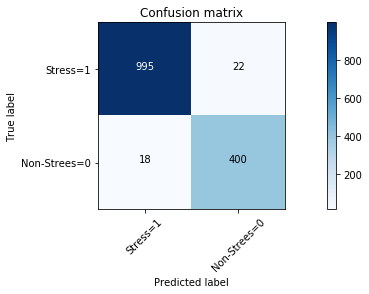

In [117]:
# Fit tuned XGBoost 
tune_xgb.fit(X_train, y_train)

# absImport sklearn packages
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Predict
pred = cross_val_predict(tune_xgb, X_test,y_test, cv=10)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, pred)

# Print results
print(f'Accuracy Score: {round(tune_xgb.score(X_test, y_test),4)}')
print(f'F1-score: {round(f1_score(y_test, pred, average="weighted"),4)}')
     
# Plot confusion matrix
plot_confusion_matrix(conf_mat, classes=['Stress=1','Non-Strees=0'], normalize= False,  title='Confusion matrix')


In [89]:
# Print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1017
           1       0.95      0.96      0.95       418

    accuracy                           0.97      1435
   macro avg       0.97      0.97      0.97      1435
weighted avg       0.97      0.97      0.97      1435



### Random Forest Evaluation

Accuracy Score: 0.9902
F1-score: 0.9673
Confusion matrix, without normalization
[[992  25]
 [ 22 396]]


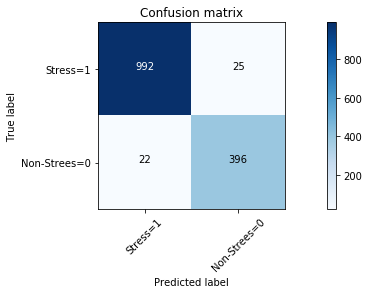

In [90]:
# Fit tuned Random Forest
tune_rf.fit(X_train, y_train)

# Import Sklearn Packages
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Predict
pred = cross_val_predict(tune_rf, X_test,y_test, cv=10)
# Confusion Matrix
conf_mat = confusion_matrix(y_test, pred)

# Print results
print(f'Accuracy Score: {round(tune_rf.score(X_test, y_test),4)}')
print(f'F1-score: {round(f1_score(y_test, pred, average="weighted"),4)}')
 
# Plot Confusion Matrix
plot_confusion_matrix(conf_mat, classes=['Stress=1','Non-Strees=0'], normalize= False,  title='Confusion matrix')

In [91]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1017
           1       0.94      0.95      0.94       418

    accuracy                           0.97      1435
   macro avg       0.96      0.96      0.96      1435
weighted avg       0.97      0.97      0.97      1435



### All Models Evaluation

In [93]:
# Create dictionary with Classifiers
dict_classifiers_2 = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tress": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    'XGboost Classifier':XGBClassifier(eval_metric='mlogloss'),
    'Tuned XGBoost Classifier':XGBClassifier(**(best_params_xgb)),
    'Tuned Random Forest':RandomForestClassifier(**(best_params_rf))
}

# New score's dataframe to store the results
scores_2 = pd.DataFrame(columns=['Model','Accuracy','F1 Score'])

# Iterate over models and evaluate on test set 
for model, instance in dict_classifiers_2.items():
    model_ = instance.fit(X_train, y_train) 
    pred = model_.predict(X_test)
    accuracy = np.mean(cross_val_score(model_, X_test, y_test, cv=10, scoring='accuracy'))
    f1 = np.mean(cross_val_score(model_, X_test, y_test, cv=10, scoring = 'f1'))
#     accuracy = round(model_.score(X_test, y_test),4)
#     f1 = round(f1_score(y_test, pred, average="weighted"),4)
    scores_2 = scores_2.append(pd.Series({'Model':model,'Accuracy':accuracy,'F1 Score':f1}),ignore_index=True)
    
# Dataframe with traininig results
scores_2.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,F1 Score
3,XGboost Classifier,0.977010,0.960563
4,Tuned XGBoost Classifier,0.972120,0.952479
2,Random Forest,0.968648,0.946107
5,Tuned Random Forest,0.967249,0.943871
0,Gradient Boosting,0.965841,0.940651
1,Decision Tress,0.953288,0.928515


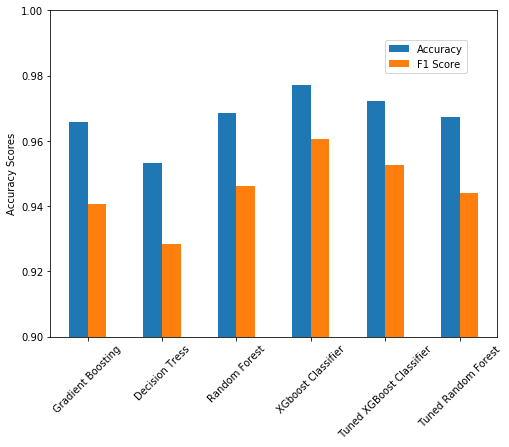

In [116]:
# Plot results
ax=scores_2.plot(kind="bar",figsize=(8,6))
ax.set_xticks(scores_2.index)
ax.set_xticklabels(scores_2.Model,rotation=45)
plt.ylabel('Accuracy Scores')
plt.ylim(bottom=0.90,top=1.0) 
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
ax.legend(loc='upper right', ncol=1, borderaxespad=3)
plt.show();